$$



\frac{\partial L}{\partial w} = \frac{2}{n} \sum_{i=1}^n \left( w \cdot X_i + b - Y_i \right) X_i


$$

$$

L_{standard} = \frac{1}{n} \sum_{i=1}^n (w.X_i + b - Y_i)^2

$$

$$

L_{non-standard} = \sum_{i=1}^n (w.X_i + b - Y_i)^2

$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [34]:
def get_current_gradients_standard(X, Y, w, b):

    dL_dw = 0
    dL_db = 0
    for i in range(len(X)):
        dL_dw += X[i]* (w*X[i] + b - Y[i])
        dL_db += (w*X[i] + b - Y[i])
    
    dL_dw = 2*dL_dw/len(X)
    dL_db = 2*dL_db/len(X)
    

    return dL_dw, dL_db

def get_current_gradients_non_standard(X,Y,w,b):
    
    dL_dw = 0
    dL_db = 0
    for i in range(len(X)):
        dL_dw += X[i]* (w*X[i] + b - Y[i])
        dL_db += (w*X[i] + b - Y[i])

    return dL_dw, dL_db

def update_weights(w,b, learning_rate, gradients):

    dl_dw = gradients[0]
    dl_db = gradients[1]
    w -= learning_rate*dl_dw
    b -= learning_rate*dl_db
    return w, b

def fit(X,Y,w=0,b=0, learning_rate = 0.01, max_iterations = 100):
    w_tracker = [0]
    grad_w_tracker = []
    for i in range(max_iterations):

        gradients = get_current_gradients_standard(X,Y,w,b)
        grad_w_tracker.append(gradients[0])

        print(f"Iteration : {i} \nPre-updation w value : {gradients[0]}\nPre-updation b value : {gradients[1]}\n")
        w,b = update_weights(w,b,learning_rate,gradients)
        w_tracker.append(w)
        print(f"Iteration : {i} \nPost-updation w value : {w}\nPost-updation b value : {b}\n")

    return w,b, w_tracker, grad_w_tracker



def get_MSE(X,Y,w,b):
    mse = 0
    for i in range(len(X)):
        mse += (w*X[i] + b - Y[i])**2
    mse = mse/len(X)
    return mse



    

In [4]:
def standardize(X):
    try:
        return (X - np.mean(X))/np.std(X)
    except:
        return ZeroDivisionError
    


Iteration : 0 
Pre-updation w value : -105.84183405586552
Pre-updation b value : 199.99999999999983

Iteration : 0 
Post-updation w value : 10.584183405586552
Post-updation b value : -19.999999999999986

Iteration : 1 
Pre-updation w value : -84.6734672446922
Pre-updation b value : 160.0

Iteration : 1 
Post-updation w value : 19.051530130055774
Post-updation b value : -35.999999999999986

Iteration : 2 
Pre-updation w value : -67.73877379575364
Pre-updation b value : 127.99999999999999

Iteration : 2 
Post-updation w value : 25.825407509631138
Post-updation b value : -48.79999999999998

Iteration : 3 
Pre-updation w value : -54.19101903660297
Pre-updation b value : 102.40000000000002

Iteration : 3 
Post-updation w value : 31.244509413291436
Post-updation b value : -59.039999999999985

Iteration : 4 
Pre-updation w value : -43.35281522928245
Pre-updation b value : 81.92

Iteration : 4 
Post-updation w value : 35.57979093621968
Post-updation b value : -67.23199999999999

Iteration : 5 

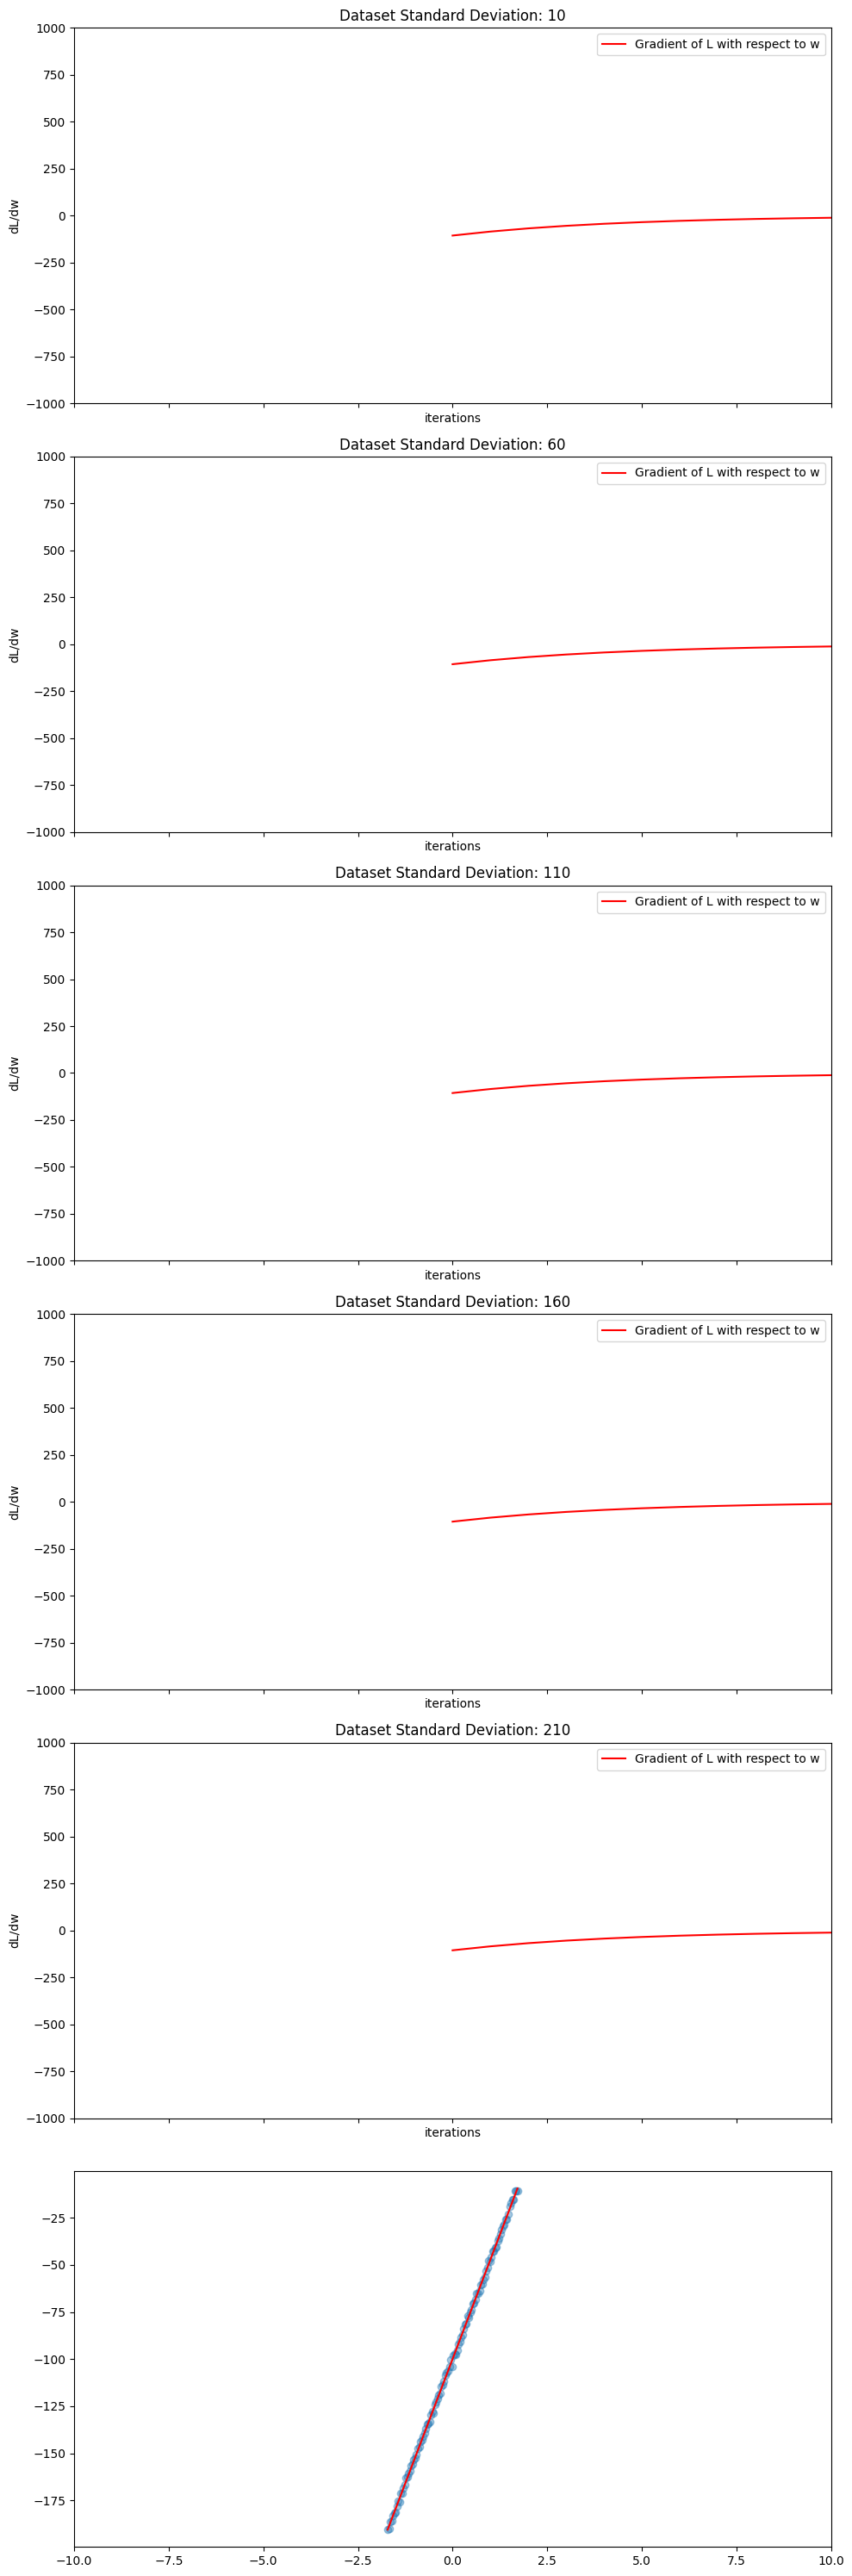

In [36]:
# Parameters for the synthetic data
num_points = 50  # Number of data points
w_original = 52.94         # Slope
b_original = -100           # Intercept
noise_level = 500.0 # Noise level
X = 0
Y = 0
w_final=0
b_final =0
w_tracker =[]
grad_w_tracker=[]
def main(bound, num_points=500):
    X = np.linspace(-bound,bound,num_points)
    X = standardize(X)
    noise = np.random.normal(0,noise_level, num_points)
    noise = standardize(noise)
    Y = w_original*X + b_original + noise

    w_final,b_final, w_tracker, grad_w_tracker = fit(X,Y, max_iterations=100, learning_rate=0.1)
    print(f"Final weights: w = {w_final}, b = {b_final}")
    return X, noise, Y, w_final, b_final, w_tracker, grad_w_tracker

X, noise, Y, w_final, b_final, w_tracker, grad_w_tracker = main(bound=10)
num_plots = 5
figure, axis = plt.subplots(num_plots+1,1, figsize=(10, num_plots*6), sharex=True)

for i in range(num_plots):
    num_points = 100
    std = 10+i*50
    X, noise, Y, w_final, b_final, w_tracker, grad_w_tracker = main(std, num_points=num_points)
    
    axis[i].plot(range(len(grad_w_tracker)), grad_w_tracker, color='red', label='Gradient of L with respect to w')
    axis[i].set_xlabel('iterations')
    axis[i].set_ylabel('dL/dw')
    axis[i].set_ylim(-1000,1000)
    axis[i].set_title(f"Dataset Standard Deviation: {std}")
    axis[i].legend()
   
    

axis[num_plots].scatter(X, Y, alpha=0.4)
axis[num_plots].plot(X, w_final*X + b_final, color='red', label='Fitted line')
axis[num_plots].set_xlim(-10,10)
print(f"MSE: {get_MSE(X,Y,w_final,b_final)}")



plt.tight_layout()

plt.show()

